# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/13/2022
* Student Name: Levi Davis
* Student Net ID: ljd3frf
* This URL: <http://localhost:8891/lab/tree/Documents/UVA/MSDS/DS5100_Programming_for_Data_Science/Final_project/final-project-submission.ipynb>
* GitHub Repo URL: https://github.com/levijb/MonteCarlo

# The Monte Carlo Module

In [6]:
import numpy as np
import pandas as pd

class Die:
    
    '''
    A die has N sides, or “faces”, and W weights, and can be rolled to select a face. 
    W defaults to 1.0 for each face but can be changed after the object is created.
    The weights are just numbers, not a normalized probability distribution.
    The die has one behavior, which is to be rolled one or more times.

    Methods
    
        __init__:     
            An initializer
            Takes an array of faces as an argument. The array's data type (dtype) 
            may be strings or numbers.
            Internally iInitializes the weights to 1.0 for each face.
            Saves both faces and weights into a private dataframe that is to be 
            shared by the other methods.
        
        change_weight:
            A method to change the weight of a single side.
            A method to change the weight of a single side.
            Takes two arguments: the face value to be changed and the new weight.
            Checks to see if the face passed is in the array of weights.
            Checks to see if the weight is a float or if it be converted to one.
            
        roll:
            A method to roll the die one or more times.
            Takes a parameter of how many times the die is to be rolled; defaults to 1. 
            Returns a list of outcomes.
            Does not store internally these results.
            
        show:
            A method to show the user the die’s current set of faces and weights
            Returns the dataframe created in the initializer.
    '''
    
    def __init__(self, names):
        self._df = pd.DataFrame({'faces': [], 'weights': []})
        self._df['faces'] = names
        self._df['weights'] = np.ones(len(names))
        
        
    def change_weight(self, face, val):
        if face not in self._df.faces.values:
            print(self._df.faces.values)
            print("The face entered does not match any current faces")
        else:
            if type(float(val)) != float:
                print(float(val))
                print("Cannot convert to a float")
            else:
                self._df.loc[self._df['faces'] == face,'weights'] = val
    
    
    def roll(self, times=1):
        probs = self._df['weights'] / self._df['weights'].sum()
        rolls = []
        for i in range(0,times):
            outcome = np.random.choice(self._df['faces'], p=probs)
            rolls.append(outcome)
        return rolls
    
    def show(self):
        return self._df
        

class Game:
    '''
    A game consists of rolling of one or more dice of the same kind one or more
    times.
    
    Each game is initialized with one or more of similarly defined dice (Die objects).
    
    By “same kind” and “similarly defined” we mean that each die in a given game has
    the same number of sides and associated faces, but each die object may have
    its own weights.
    
    The class has a behavior to play a game, i.e. to rolls all of the dice a given
    number of times.
        
    The class keeps the results of its most recent play. 
    
    Methods:
        __init__:
            An initializer
            Takes a single parameter, a list of already instantiated similar Die
            objects.
            
        play:
            Takes a parameter to specify how many times the dice should be rolled.
            Saves the result of the play to a private dataframe of shape N rolls
            by M dice.
            The private dataframe has the roll number is a named index.
            
        show:
            A method to show the user the results of the most recent play.
            This method passes the private dataframe to the user.
            Takes a parameter to return the dataframe in narrow or wide form.
            This parameter defaults to wide form.
            This parameter raises an exception of the user passes an invalid option.
    '''
    def __init__(self, die):
        self.die = die
        

    def play(self, times = 1):
        self._gdf = pd.DataFrame()
        for dice in self.die:
            results = dice.roll(times)
            self._gdf[self.die.index(dice)] = results
            self._gdf.index.name = 'roll number'
            self._gdf = self._gdf.rename_axis('die number', axis ='columns')            
    
    def show(self, view = 'wide'):
        if view.lower() == 'wide': 
            return (self._gdf)
        elif view.lower() == 'narrow':
            print(self._gdf.stack())
        else:
            print('Please enter "wide" or "narrow"')
        return self._gdf


class Analyzer:
    
    '''
    An analyzer takes the results of a single game and computes various descriptive 
    statistical properties about it. These properties results are available as 
    attributes of an Analyzer object.
    
    Methods:
        __init__:
            An initializer
            Takes a game object as its input parameter. 
            
        jackpot:
            A jackpot method to compute how many times the game resulted in all 
            faces being identical.
            Returns an integer for the number times to the user.
            Stores the results as a dataframe of jackpot results in a public 
            attribute.
            
        combo:
            A combo method to compute the distinct combinations of faces rolled, 
            along with their counts.
            Combinations should be sorted and saved as a multi-columned index.
            Stores the results as a dataframe in a public attribute.
            
        facecounts:
            A face counts per roll method to compute how many times a given face 
            is rolled in each event.
            Stores the results as a dataframe in a public attribute.
            The dataframe has an index of the roll number and face values as 
            columns (i.e. it is in wide format).
    '''
    
    
    
    def __init__(self, game):
        self.game = game

    def jackpot(self):
        self.jack_tally = 0
        self.df_jackpot = pd.DataFrame()
        for row in self.game._gdf.index:
            set_check = set()
            for col in self.game._gdf.iloc[[row]]:
                set_check.add(self.game._gdf.iloc[row][col])
            if len(set_check) == 1:
                self.jack_tally += 1
                self.df_jackpot = self.df_jackpot.append(self.game._gdf.iloc[[row]])
        return self.jack_tally

    def combo(self):
        self.combo = pd.DataFrame()
        self.combo = self.game._gdf.apply(lambda x: pd.Series(sorted(x)), 1).\
            value_counts().to_frame('n')
        return self.combo.reset_index()
            
        
    def face_counts(self):
        dict1 = {}
        for row in self.game.die[0]._df.faces:
            cnt= self.game._gdf.isin({row}).sum(1)
            dict1[row] = cnt
        self.fc_df = pd.DataFrame(dict1)
        return self.fc_df

# Test Module

In [8]:
import unittest
import pandas

test_die = Die([1,2,3,4,5,6])
test_die2 = Die([1,2,3,4,5,6])
test_game = Game([test_die,test_die2])
test_analyzer = Analyzer(test_game)
test_die.change_weight(4,4)
a = test_die.roll(2)
b = test_game.play(3)
test_game._gdf

class DieTest(unittest.TestCase):
    
    def test1_init(self):
        self.assertTrue(test_die._df.iloc[0,0] == 1)
        
    def test2_change_weight(self):
        test_die.change_weight(1, 3)
        self.assertEqual(test_die._df.iloc[0,1], 3)
    
    
    def test3_roll(self):
        self.assertEqual(len(a), 2)
        
    
    def test4_show(self):
        self.assertTrue(isinstance(test_die.show(), pandas.DataFrame))
        
        
        
class GameTest(unittest.TestCase):
    
    def test5_init(self):
        self.assertTrue(isinstance(test_game, Game))

    def test6_play(self):
        self.assertEqual(len(test_game._gdf),3)

    def test7_show(self):
        b = test_game.show()
        self.assertTrue(isinstance(b,pandas.DataFrame))
        

class AnalyzerTest(unittest.TestCase):
    
    def test8_init(self):
        self.assertTrue(isinstance(test_analyzer.game, Game))

    def test9_jackpot(self):
        self.assertTrue(isinstance(test_analyzer.jackpot(), int))
        
    def test10_combo(self):
        self.assertTrue(isinstance(test_analyzer.combo(), pandas.DataFrame))

    def test11_facecounts(self):
        self.assertTrue(isinstance(test_analyzer.face_counts(), pandas.DataFrame))


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)

test10_combo (__main__.AnalyzerTest) ... ok
test11_facecounts (__main__.AnalyzerTest) ... ok
test8_init (__main__.AnalyzerTest) ... ok
test9_jackpot (__main__.AnalyzerTest) ... ok
test1_init (__main__.DieTest) ... ok
test2_change_weight (__main__.DieTest) ... ok
test3_roll (__main__.DieTest) ... ok
test4_show (__main__.DieTest) ... ok
test5_init (__main__.GameTest) ... ok
test6_play (__main__.GameTest) ... ok
test7_show (__main__.GameTest) ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.054s

OK


# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [9]:
from MonteCarlo import montecarlo as m
from matplotlib import pyplot
import pandas as pd
import numpy as np
import copy

In [10]:
fair_coin1 = m.Die(['H','T'])
fair_coin2 = m.Die(['H','T'])
fair_coin3 = m.Die(['H','T'])

unfair_coin1 = m.Die(['H', 'T'])
unfair_coin2 = m.Die(['H', 'T'])
unfair_coin3 = m.Die(['H', 'T'])

unfair_coin1.change_weight('H', 5)
unfair_coin2.change_weight('H', 5)
unfair_coin3.change_weight('H', 5)

In [11]:
fair_game = m.Game([fair_coin1,fair_coin2,fair_coin3])
n_rolls = 1000
fair_game.play(n_rolls)
fair_game.show()

unfair_game = m.Game([unfair_coin1,unfair_coin2,fair_coin3])
unfair_game.play(1000)
unfair_game.show()

unfair_analyze = m.Analyzer(unfair_game)
jack_unfair = unfair_analyze.jackpot()

fair_analyze = m.Analyzer(fair_game)
jack_fair = fair_analyze.jackpot()

jack_freq_unfair = jack_unfair/n_rolls
jack_freq_fair = jack_fair/n_rolls

<BarContainer object of 2 artists>

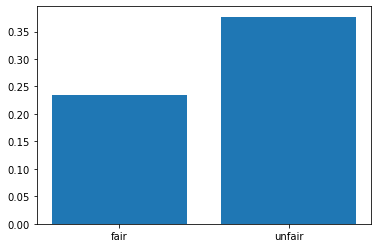

In [12]:
data= {'fair': jack_freq_fair, 'unfair': jack_freq_unfair}
pyplot.bar(data.keys(), data.values())

## Scenario 2

<BarContainer object of 2 artists>

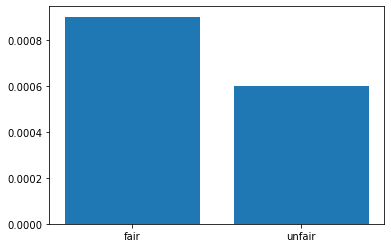

In [13]:
fair_die = m.Die([1,2,3,4,5,6])
unfair_dietype1 = m.Die([1,2,3,4,5,6])
unfair_dietype1.change_weight(6,5)
unfair_dietype2 = m.Die([1,2,3,4,5,6])
unfair_dietype2.change_weight(1,5)

fair_die1 = m.Die([1,2,3,4,5,6])
fair_die2 = m.Die([1,2,3,4,5,6])
fair_die3 = m.Die([1,2,3,4,5,6])
fair_die4 = m.Die([1,2,3,4,5,6])
fair_die5 = m.Die([1,2,3,4,5,6])
fair_game = m.Game([fair_die1,fair_die2,fair_die3,fair_die4,fair_die5])
n_rolls =10000

fair_game.play(n_rolls)
fair_game.show()

unfair_dietype1_1 = m.Die([1,2,3,4,5,6])
unfair_dietype1_1.change_weight(6,5)
unfair_dietype1_2 = m.Die([1,2,3,4,5,6])
unfair_dietype1_2.change_weight(6,5)
unfair_dietype2_1 = m.Die([1,2,3,4,5,6])
unfair_dietype2_1.change_weight(1,5)
fair_die1 = m.Die([1,2,3,4,5,6])
fair_die2 = m.Die([1,2,3,4,5,6])
unfair_game = m.Game([unfair_dietype1_1,unfair_dietype1_2,unfair_dietype2_1,fair_die1,fair_die2])
unfair_game.play(n_rolls)

fair_analy = m.Analyzer(fair_game)
unfair_analy = m.Analyzer(unfair_game)

jack_freq_fair = fair_analy.jackpot()/n_rolls
jack_freq_unfair = unfair_analy.jackpot()/n_rolls

data= {'fair': jack_freq_fair, 'unfair': jack_freq_unfair}
pyplot.bar(data.keys(), data.values())

<BarContainer object of 10 artists>

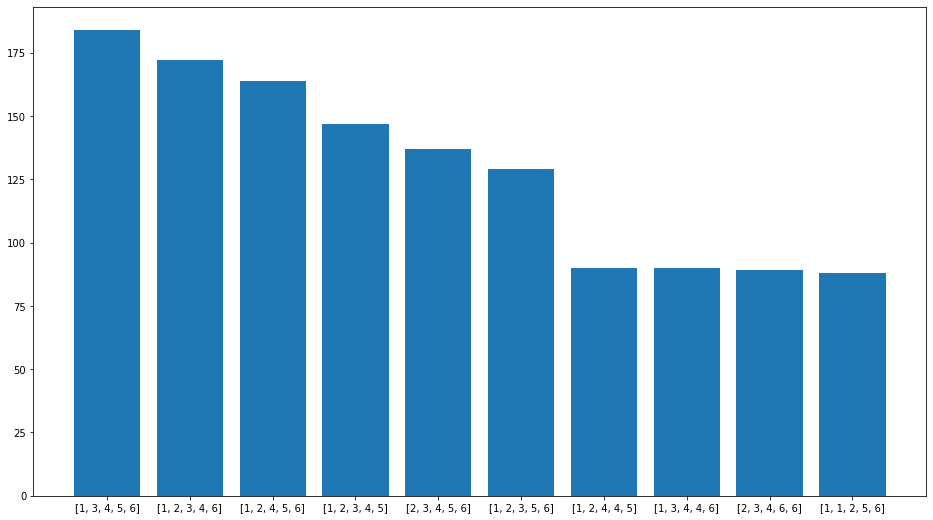

In [14]:
combo_fair = fair_analy.combo()
combo_unfair = unfair_analy.combo()

freqs = combo_fair.head(10)["n"].values.tolist()
nums = combo_fair.head(10)[[0,1,2,3,4]].values.tolist()
nums = [str(i) for i in nums]

pyplot.figure(figsize=(16,9))
pyplot.bar(nums, freqs)

## Scenario 3

In [15]:
letterdie = m.Die(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])

In [16]:
letterdie.change_weight('a', 8.4966)
letterdie.change_weight('b', 2.0720)
letterdie.change_weight('c', 4.5388)
letterdie.change_weight('d', 3.3844)
letterdie.change_weight('e', 11.1607)
letterdie.change_weight('f', 1.8121)
letterdie.change_weight('g', 2.4705)
letterdie.change_weight('h', 3.0034)
letterdie.change_weight('i', 7.5448)
letterdie.change_weight('j', 0.1965)
letterdie.change_weight('k', 1.1016)
letterdie.change_weight('l',5.4893 )
letterdie.change_weight('m',3.0129 )
letterdie.change_weight('n',6.6544)
letterdie.change_weight('o',7.1635)
letterdie.change_weight('p',3.1671 )
letterdie.change_weight('q',0.1962 )
letterdie.change_weight('r',7.5809)
letterdie.change_weight('s',5.7351 )
letterdie.change_weight('t',6.9509)
letterdie.change_weight('u',3.6308 )
letterdie.change_weight('v',1.0074)
letterdie.change_weight('w',1.2899 )
letterdie.change_weight('x',0.2902 )
letterdie.change_weight('y',1.7779)
letterdie.change_weight('z',0.2722 )

letterdie1 = copy.deepcopy(letterdie)
letterdie2 = copy.deepcopy(letterdie)
letterdie3 = copy.deepcopy(letterdie)
letterdie4 = copy.deepcopy(letterdie)
letterdie5 = copy.deepcopy(letterdie)

In [17]:
g = m.Game([letterdie1, letterdie2, letterdie3, letterdie4, letterdie5])

In [18]:
g.play(1000)
g.show().apply(lambda x: pd.Series(x),1).value_counts().to_frame('n').reset_index()
g.show().head(60)

die number,0,1,2,3,4
roll number,,,,,
0,c,i,e,i,h
1,a,i,a,w,s
2,s,i,n,s,e
3,e,b,a,n,e
4,e,y,e,r,p
5,e,l,a,g,e
6,i,p,e,k,t
7,i,n,i,e,t
8,l,m,e,a,u


In the first 60 rows I did not see a single 5-letter word, so the frequency most likely is less than 2% and I would guess even much less than 1%.

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [27]:
!ls -lR

.:
total 5645
-rw-r--r-- 1 Unknown+User Unknown+Group 5570105 Jul 14 00:11 Final_project.pdf
drwxr-xr-x 1 Unknown+User Unknown+Group       0 Jul 14 10:10 MonteCarlo
-rw-r--r-- 1 Unknown+User Unknown+Group   19664 Jul 13 23:01 README.ipynb
-rw-r--r-- 1 Unknown+User Unknown+Group    8421 Jul 13 22:29 README.md
-rw-r--r-- 1 Unknown+User Unknown+Group   89757 Jul 14 10:02 Scenarios.ipynb
-rw-r--r-- 1 Unknown+User Unknown+Group     604 Jul 14 10:02 Untitled.ipynb
drwxr-xr-x 1 Unknown+User Unknown+Group       0 Jul 13 20:31 __pycache__
-rw-r--r-- 1 Unknown+User Unknown+Group   64170 Jul 14 10:10 final-project-submission.ipynb
-rw-r--r-- 1 Unknown+User Unknown+Group    1857 Jul 14 10:02 montecarlo_test.py
-rw-r--r-- 1 Unknown+User Unknown+Group     566 Jul 13 20:32 montecarlo_test_results.txt
-rw-r--r-- 1 Unknown+User Unknown+Group     417 Jul 13 20:39 setup.py

./MonteCarlo:
total 9
-rw-r--r-- 1 Unknown+User Unknown+Group   39 Jul 14 10:10 __init__.py
drwxr-xr-x 1 Unknown+User Unknown+Group 

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [13]:
# Installation commands

In [14]:
!pip install MonteCarlo

  Using cached montecarlo-0.1.17-py3-none-any.whl
